In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
from sklearn.preprocessing import StandardScaler


In [6]:
data = pd.read_csv('ai_jobs.csv')
df = pd.DataFrame(data)
df

,job_id,job_title,company_type,industry,country,city,remote_type,experience_level,min_experience_years,salary_min_usd,salary_max_usd,employment_type,posted_year,company_size
0,0IFD0TVBDIVU,MLOps Engineer,Research Lab,Education,Australia,Remote,Remote,Entry,0,56873,72223,Full-time,2023,Large
1,ZMF8MDD4V30T,Data Analyst,Startup,Education,Germany,Remote,Remote,Entry,0,54803,85599,Full-time,2024,Medium
2,CX1945NQ4FMY,MLOps Engineer,Research Lab,Tech,Canada,Remote,Remote,Senior,5,149980,175806,Full-time,2021,Large
3,QJ7YHL1C32OC,Applied Scientist,Research Lab,Healthcare,Australia,Remote,Remote,Entry,0,53483,86477,Full-time,2023,Medium
4,F0T0PVN9ER14,Machine Learning Engineer,Research Lab,Finance,Australia,Sydney,Hybrid,Mid,2,102977,127298,Full-time,2023,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,UN0T2IZO2KCL,AI Researcher,MNC,Retail,Australia,Melbourne,Onsite,Senior,5,143800,174698,Full-time,2023,Medium
49996,CETZGCR42LC8,Data Scientist,Startup,Retail,Canada,Vancouver,Onsite,Senior,5,140248,161993,Full-time,2024,Medium
49997,EQ9PTEJEFKUI,Data Analyst,Startup,Healthcare,USA,New York,Onsite,Entry,0,50953,87158,Full-time,2022,Small
49998,92UNH47RTAGS,Data Scientist,Research Lab,Healthcare,USA,Austin,Hybrid,Entry,0,63712,76213,Full-time,2020,Large


In [26]:
df.shape

(50000, 14)

In [27]:
df.describe()

,min_experience_years,salary_min_usd,salary_max_usd,posted_year
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.335500,100871.434320,120858.350740,2022.996360
std,2.054172,37043.446641,37531.386484,2.001286
min,0.000000,50000.000000,65000.000000,2020.000000
25%,0.000000,61287.000000,83739.000000,2021.000000
50%,2.000000,97505.000000,117604.000000,2023.000000
75%,5.000000,143730.500000,161348.750000,2025.000000
max,5.000000,154999.000000,180000.000000,2026.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_id                50000 non-null  object
 1   job_title             50000 non-null  object
 2   company_type          50000 non-null  object
 3   industry              50000 non-null  object
 4   country               50000 non-null  object
 5   city                  50000 non-null  object
 6   remote_type           50000 non-null  object
 7   experience_level      50000 non-null  object
 8   min_experience_years  50000 non-null  int64 
 9   salary_min_usd        50000 non-null  int64 
 10  salary_max_usd        50000 non-null  int64 
 11  employment_type       50000 non-null  object
 12  posted_year           50000 non-null  int64 
 13  company_size          50000 non-null  object
dtypes: int64(4), object(10)
memory usage: 5.3+ MB


In [31]:
df.isnull().sum() * 100


job_id                  0
job_title               0
company_type            0
industry                0
country                 0
city                    0
remote_type             0
experience_level        0
min_experience_years    0
salary_min_usd          0
salary_max_usd          0
employment_type         0
posted_year             0
company_size            0
dtype: int64

In [8]:
df1 = pd.read_csv('ai_jobs.csv' , usecols = ['industry'])
df1

,industry
0,Education
1,Education
2,Tech
3,Healthcare
4,Finance
...,...
49995,Retail
49996,Retail
49997,Healthcare
49998,Healthcare


In [9]:
df1.sort_values(by='industry',ascending=False)

,industry
25000,Tech
30673,Tech
30664,Tech
9724,Tech
30662,Tech
...,...
27543,Education
40868,Education
27542,Education
4590,Education


In [10]:
df1.sort_values(by='industry',ascending=True)

,industry
0,Education
12076,Education
7102,Education
15821,Education
12073,Education
...,...
41294,Tech
31383,Tech
41297,Tech
41287,Tech


In [13]:
result = df.groupby(['job_title','min_experience_years']).size().reset_index().rename(columns={0: 'result'})
result

,job_title,min_experience_years,result
0,AI Researcher,0,2760
1,AI Researcher,2,2934
2,AI Researcher,5,2721
3,Applied Scientist,0,2729
4,Applied Scientist,2,2726
5,Applied Scientist,5,2843
6,Data Analyst,0,2735
7,Data Analyst,2,2707
8,Data Analyst,5,2818
9,Data Scientist,0,2827


<Axes: xlabel='job_title', ylabel='min_experience_years'>

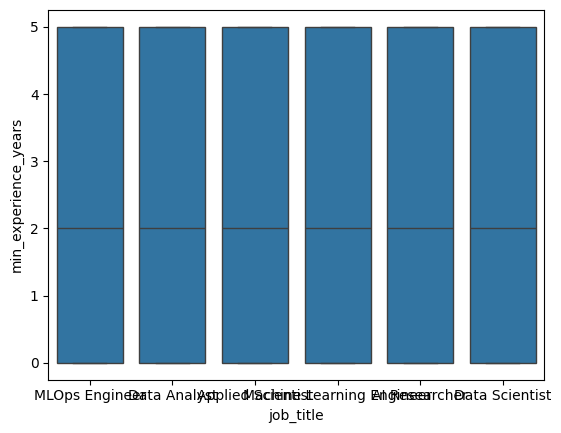

In [38]:
plt.Figure(figsize=(15,8))
sns.boxplot(
    data = df,
    x = 'job_title',
    y = 'min_experience_years'
)

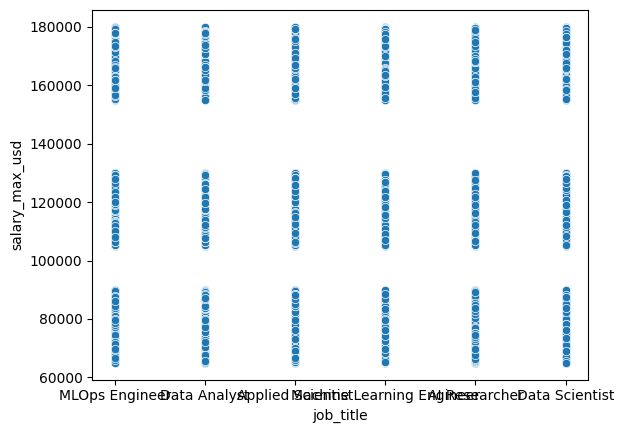

In [47]:
plt.Figure(figsize=(15,10))
sns.scatterplot(
    data = df,
    x = "job_title",
    y = "salary_max_usd",
)
plt.show()

In [52]:
q2 = np.median(df['salary_max_usd'])
q1= np.percentile(df['salary_max_usd'], 25, method='midpoint')
q3= np.percentile(df['salary_max_usd'], 75, method='midpoint')
print(q1),
print(q2),
print(q3)

83739.0
117604.0
161349.5


In [53]:
iqr = q3 - q1
print("IQR: ", iqr)

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

IQR:  77610.5
Lower Bound:  -32676.75
Upper Bound:  277765.25


In [55]:
outlier = []
for x in df['salary_max_usd']:
    if x < lower_bound or x > upper_bound:
        outlier.append(x)
print("Outliers: ", x)

Outliers:  166972


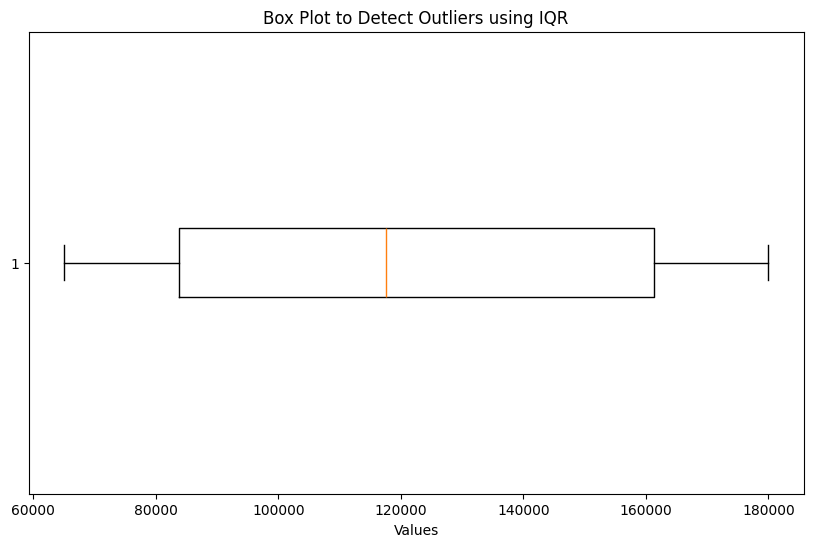

In [56]:
plt.figure(figsize=(10,6))
plt.boxplot(df['salary_max_usd'], vert=False)
plt.title("Box Plot to Detect Outliers using IQR")
plt.xlabel("Values")
plt.show()


In [61]:
le = StandardScaler()
df['scaling'] = le.fit_transform(df[['salary_max_usd']])
df['scaling']

0       -1.295871
1       -0.939472
2        1.464060
3       -0.916078
4        0.171582
           ...   
49995    1.434538
49996    1.096018
49997   -0.897933
49998   -1.189559
49999    1.228681
Name: scaling, Length: 50000, dtype: float64